#### Computational Intelligence Project
#### Fruit Classification
#### Narges Sodeifi
## Step One: Reading Fruit Dataset


In [32]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pickle
from statistics import mean

# loading training set features
f = open("Datasets/train_set_features.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.3]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set = []
test_set = []

for i in range(len(train_set_features)):
    label = np.array([0, 0, 0, 0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(4, 1)
    train_set.append((train_set_features[i].reshape(102, 1), label))

for i in range(len(test_set_features)):
    label = np.array([0, 0, 0, 0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(4, 1)
    test_set.append((test_set_features[i].reshape(102, 1), label))

# shuffle
random.shuffle(train_set)
random.shuffle(test_set)

## Needed Functions
Useful functions that we need throughout this notebook.

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


def feedforward(w, a, bias, activation_func):
    z = (w @ a) + bias
    if activation_func == 'sigmoid':
        return sigmoid(z)


def cost_calculator(dataset, w1, w2, w3, b1, b2, b3, c):
    for trainData in dataset:
        a_0 = trainData[0]
        a_1 = feedforward(w1, a_0, b1, 'sigmoid')
        a_2 = feedforward(w2, a_1, b2, 'sigmoid')
        a_3 = feedforward(w3, a_2, b3, 'sigmoid')

        for j in range(4):
            c += np.power((a_3[j, 0] - trainData[1][j, 0]), 2)
    c /= len(dataset)
    total_costs.append(c)


def calculate_accuracy(dataset, w1, w2, w3, b1, b2, b3, total_num):
    correct_guesses = 0
    for trainData in dataset:
        a_0 = trainData[0]
        a_1 = feedforward(w1, a_0, b1, 'sigmoid')
        a_2 = feedforward(w2, a_1, b2, 'sigmoid')
        a_3 = feedforward(w3, a_2, b3, 'sigmoid')

        predicted_label = np.argmax(a_3, axis=0)
        real_label = np.argmax(trainData[1], axis=0)

        if predicted_label[0] == real_label[0]:
            correct_guesses += 1
    accuracy = (correct_guesses / total_num) * 100
    return accuracy


def initialize():
    w1 = np.random.standard_normal(size=(150, 102))
    b1 = np.zeros((150, 1))

    w2 = np.random.standard_normal(size=(60, 150))
    b2 = np.zeros((60, 1))

    w3 = np.random.standard_normal(size=(4, 60))
    b3 = np.zeros((4, 1))

    w = [w1, w2, w3]
    bias = [b1, b2, b3]

    return w, bias

## Step Two: Feedforward
In this step we work with 200 sample. We allocate a k * n matrix for weights between layers in the implementation.<br/>
n : number of neurons on the current layer <br>
k : number of neurons on the next layer <br>
Each row of our matrix W shows the weights of a single neuron on the following layer.

In [20]:
W_1 = np.random.normal(size=(150, 102))
W_2 = np.random.normal(size=(60, 150))
W_3 = np.random.normal(size=(4, 60))
b_1 = np.zeros((150, 1))
b_2 = np.zeros((60, 1))
b_3 = np.zeros((4, 1))

number_of_samples = 200
train_sample_200 = random.sample(train_set, number_of_samples)
print(f"Accuracy: {calculate_accuracy(train_sample_200, W_1, W_2, W_3, b_1, b_2, b_3, number_of_samples)}")

Accuracy: 27.500000000000004


Accuracy is very low in this step, because we just feedforward the network and didn't back propagate.<br>
Due to the fact that the learning process has not progressed, we anticipate an accuracy of roughly 25%.

## Step Three: Backpropagation


Setting learning rate, number of epochs and batch size

In [11]:
batch_size = 10
learning_rate = 1
number_of_epochs = 5

In [21]:
% % time
W, b = initialize()
total_costs = []
for i in range(number_of_epochs):
    batches = [train_set[x:x + batch_size] for x in range(0, number_of_samples, batch_size)]
    for batch in batches:
        grad_W1 = np.zeros((150, 102))
        grad_b1 = np.zeros((150, 1))

        grad_W2 = np.zeros((60, 150))
        grad_b2 = np.zeros((60, 1))

        grad_W3 = np.zeros((4, 60))
        grad_b3 = np.zeros((4, 1))

        for image, label in batch:
            # forward propagation
            a1 = feedforward(W[0], image, b[0], 'sigmoid')
            a2 = feedforward(W[1], a1, b[1], 'sigmoid')
            a3 = feedforward(W[2], a2, b[2], 'sigmoid')

            z1 = (W[0] @ image) + b[0]
            z2 = (W[1] @ a1) + b[1]
            z3 = (W[2] @ a2) + b[2]

            # Output layer
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * derivative_sigmoid(z3[j, 0]) * a2[k, 0]

            for j in range(grad_b3.shape[0]):
                grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * derivative_sigmoid(z3[j, 0])

            # Hidden layer 2
            grad_a2 = np.zeros((60, 1))
            for k in range(60):
                for j in range(4):
                    grad_a2[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * derivative_sigmoid(z3[j, 0]) * W[2][j, k]

            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += grad_a2[k, 0] * derivative_sigmoid(z2[k, 0]) * a1[m, 0]

            for k in range(grad_b2.shape[0]):
                grad_b2[k, 0] += grad_a2[k, 0] * derivative_sigmoid(z2[k, 0])

            # Hidden layer 1
            grad_a1 = np.zeros((150, 1))
            for m in range(150):
                for k in range(60):
                    grad_a1[m, 0] += grad_a2[k, 0] * derivative_sigmoid(z2[k, 0]) * W[1][k, m]

            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += grad_a1[m, 0] * derivative_sigmoid(z1[m, 0]) * image[v, 0]

            for m in range(grad_b1.shape[0]):
                grad_b1[m, 0] += grad_a1[m, 0] * derivative_sigmoid(z1[m, 0])

        W[0] -= (learning_rate * (grad_W1 / batch_size))
        W[1] -= (learning_rate * (grad_W2 / batch_size))
        W[2] -= (learning_rate * (grad_W3 / batch_size))

        b[0] -= (learning_rate * (grad_b1 / batch_size))
        b[1] -= (learning_rate * (grad_b2 / batch_size))
        b[2] -= (learning_rate * (grad_b3 / batch_size))

    cost = 0
    cost_calculator(train_sample_200, W[0], W[1], W[2], b[0], b[1], b[2], cost)

CPU times: user 5min 52s, sys: 4.56 s, total: 5min 56s
Wall time: 3min 25s


Accuracy: 57.49999999999999


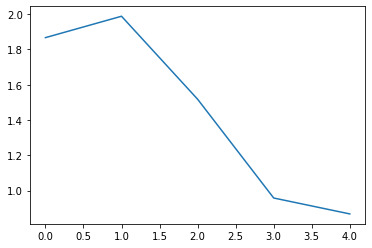

In [22]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
print(f"Accuracy: {calculate_accuracy(train_sample_200, W[0], W[1], W[2], b[0], b[1], b[2], number_of_samples)}")

The Cost function is decreasing. As a result, we know that our Neural Network is working properly.


## Step Four: Vectorization
To save time, we re-create the previous NN, but this time without the loops.<br>

In [7]:
% % time
batch_size = 10
learning_rate = 1
number_of_epochs = 10
W, b = initialize()
total_costs = []
for i in range(number_of_epochs):
    batches = [train_sample_200[x:x + batch_size] for x in range(0, len(train_sample_200), batch_size)]
    for batch in batches:
        grad_W1 = np.zeros((150, 102))
        grad_b1 = np.zeros((150, 1))

        grad_W2 = np.zeros((60, 150))
        grad_b2 = np.zeros((60, 1))

        grad_W3 = np.zeros((4, 60))
        grad_b3 = np.zeros((4, 1))

        for image, label in batch:
            # Forward propagation
            a1 = feedforward(W[0], image, b[0], 'sigmoid')
            a2 = feedforward(W[1], a1, b[1], 'sigmoid')
            a3 = feedforward(W[2], a2, b[2], 'sigmoid')

            z1 = (W[0] @ image) + b[0]
            z2 = (W[1] @ a1) + b[1]
            z3 = (W[2] @ a2) + b[2]

            # Output layer
            grad_W3 += (2 * (a3 - label) * derivative_sigmoid(z3)) @ np.transpose(a2)
            grad_b3 += 2 * (a3 - label) * derivative_sigmoid(z3)

            # Hidden layer 2
            grad_a2 = np.zeros((60, 1))
            grad_a2 += np.transpose(W[2]) @ (2 * (a3 - label) * derivative_sigmoid(z3))
            grad_W2 += (derivative_sigmoid(z2) * grad_a2) @ np.transpose(a1)
            grad_b2 += grad_a2 * derivative_sigmoid(z2)

            # Hidden layer 1
            grad_a1 = np.zeros((150, 1))
            grad_a1 += np.transpose(W[1]) @ (grad_a2 * derivative_sigmoid(z2))
            grad_W1 += (grad_a1 * derivative_sigmoid(z1)) @ np.transpose(image)
            grad_b1 += grad_a1 * derivative_sigmoid(z1)

        W[0] -= (learning_rate * (grad_W1 / batch_size))
        W[1] -= (learning_rate * (grad_W2 / batch_size))
        W[2] -= (learning_rate * (grad_W3 / batch_size))

        b[0] -= (learning_rate * (grad_b1 / batch_size))
        b[1] -= (learning_rate * (grad_b2 / batch_size))
        b[2] -= (learning_rate * (grad_b3 / batch_size))
    cost = 0
    cost_calculator(train_sample_200, W[0], W[1], W[2], b[0], b[1], b[2], cost)

CPU times: user 33.4 s, sys: 511 ms, total: 33.9 s
Wall time: 23.6 s


As can be seen, the execution time is significantly reduced.

Accuracy: 100.0


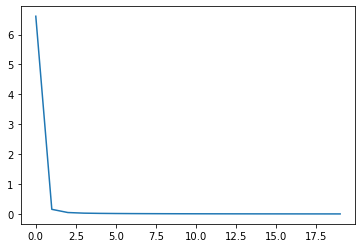

In [8]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
print(f"Accuracy: {calculate_accuracy(train_sample_200, W[0], W[1], W[2], b[0], b[1], b[2], len(train_sample_200))}")

Test the model ten times and average the results.

Average accuracy: 99.9


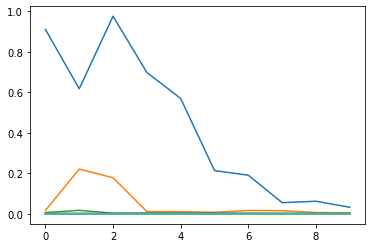

In [35]:
batch_size = 10
learning_rate = 1
number_of_epochs = 10
average_accuracy = []
W, b = initialize()
for i in range(10):
    total_costs = []
    for i in range(number_of_epochs):
        np.random.shuffle(train_sample_200)
        batches = [train_sample_200[x:x + batch_size] for x in range(0, len(train_sample_200), batch_size)]
        for batch in batches:
            grad_W1 = np.zeros((150, 102))
            grad_b1 = np.zeros((150, 1))

            grad_W2 = np.zeros((60, 150))
            grad_b2 = np.zeros((60, 1))

            grad_W3 = np.zeros((4, 60))
            grad_b3 = np.zeros((4, 1))

            for image, label in batch:
                # Forward propagation
                a1 = feedforward(W[0], image, b[0], 'sigmoid')
                a2 = feedforward(W[1], a1, b[1], 'sigmoid')
                a3 = feedforward(W[2], a2, b[2], 'sigmoid')

                z1 = (W[0] @ image) + b[0]
                z2 = (W[1] @ a1) + b[1]
                z3 = (W[2] @ a2) + b[2]

                # Output layer
                grad_W3 += (2 * (a3 - label) * derivative_sigmoid(z3)) @ np.transpose(a2)
                grad_b3 += 2 * (a3 - label) * derivative_sigmoid(z3)

                # Hidden layer 2
                grad_a2 = np.zeros((60, 1))
                grad_a2 += np.transpose(W[2]) @ (2 * (a3 - label) * derivative_sigmoid(z3))
                grad_W2 += (derivative_sigmoid(z2) * grad_a2) @ np.transpose(a1)
                grad_b2 += grad_a2 * derivative_sigmoid(z2)

                # Hidden layer 1
                grad_a1 = np.zeros((150, 1))
                grad_a1 += np.transpose(W[1]) @ (grad_a2 * derivative_sigmoid(z2))
                grad_W1 += (grad_a1 * derivative_sigmoid(z1)) @ np.transpose(image)
                grad_b1 += grad_a1 * derivative_sigmoid(z1)

            W[0] -= (learning_rate * (grad_W1 / batch_size))
            W[1] -= (learning_rate * (grad_W2 / batch_size))
            W[2] -= (learning_rate * (grad_W3 / batch_size))

            b[0] -= (learning_rate * (grad_b1 / batch_size))
            b[1] -= (learning_rate * (grad_b2 / batch_size))
            b[2] -= (learning_rate * (grad_b3 / batch_size))
        cost = 0
        cost_calculator(train_sample_200, W[0], W[1], W[2], b[0], b[1], b[2], cost)
    epoch_size = [x for x in range(number_of_epochs)]
    plt.plot(epoch_size, total_costs)
    average_accuracy.append(calculate_accuracy(train_sample_200, W[0], W[1], W[2], b[0], b[1], b[2], number_of_samples))
print(f"Average accuracy: {mean(average_accuracy)}")

## Step Five: Testing the Model
Finally, we take the complete dataset as input and iterate through all of the photographs to determine the correctness of our train and test sets with no regard for time.


In [9]:
% % time
batch_size = 10
learning_rate = 1
number_of_epochs = 10
W, b = initialize()
total_costs = []
for i in range(number_of_epochs):
    batches = [train_set[x:x + batch_size] for x in range(0, len(train_set), batch_size)]
    for batch in batches:
        grad_W1 = np.zeros((150, 102))
        grad_b1 = np.zeros((150, 1))

        grad_W2 = np.zeros((60, 150))
        grad_b2 = np.zeros((60, 1))

        grad_W3 = np.zeros((4, 60))
        grad_b3 = np.zeros((4, 1))

        for image, label in batch:
            # Forward propagation
            a1 = feedforward(W[0], image, b[0], 'sigmoid')
            a2 = feedforward(W[1], a1, b[1], 'sigmoid')
            a3 = feedforward(W[2], a2, b[2], 'sigmoid')

            z1 = (W[0] @ image) + b[0]
            z2 = (W[1] @ a1) + b[1]
            z3 = (W[2] @ a2) + b[2]

            # Output layer
            grad_W3 += (2 * (a3 - label) * derivative_sigmoid(z3)) @ np.transpose(a2)
            grad_b3 += 2 * (a3 - label) * derivative_sigmoid(z3)

            # Hidden layer 2
            grad_a2 = np.zeros((60, 1))
            grad_a2 += np.transpose(W[2]) @ (2 * (a3 - label) * derivative_sigmoid(z3))
            grad_W2 += (derivative_sigmoid(z2) * grad_a2) @ np.transpose(a1)
            grad_b2 += grad_a2 * derivative_sigmoid(z2)

            # Hidden layer 1
            grad_a1 = np.zeros((150, 1))
            grad_a1 += np.transpose(W[1]) @ (grad_a2 * derivative_sigmoid(z2))
            grad_W1 += (grad_a1 * derivative_sigmoid(z1)) @ np.transpose(image)
            grad_b1 += grad_a1 * derivative_sigmoid(z1)

        W[0] -= (learning_rate * (grad_W1 / batch_size))
        W[1] -= (learning_rate * (grad_W2 / batch_size))
        W[2] -= (learning_rate * (grad_W3 / batch_size))

        b[0] -= (learning_rate * (grad_b1 / batch_size))
        b[1] -= (learning_rate * (grad_b2 / batch_size))
        b[2] -= (learning_rate * (grad_b3 / batch_size))
    cost = 0
    cost_calculator(train_set, W[0], W[1], W[2], b[0], b[1], b[2], cost)

CPU times: user 33.9 s, sys: 517 ms, total: 34.4 s
Wall time: 23.7 s


Accuracy of our model for train set is: 100.0
Accuracy of our model for test set is: 100.0


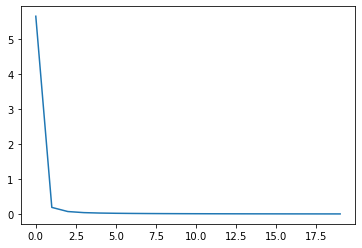

In [10]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
print(
    f"Accuracy of our model for train set is: {calculate_accuracy(train_set, W[0], W[1], W[2], b[0], b[1], b[2], len(train_set))}")
print(
    f"Accuracy of our model for test set is: {calculate_accuracy(test_set, W[0], W[1], W[2], b[0], b[1], b[2], len(test_set))}")

Test the model ten times and average the results.

[100.0, 100.0, 75.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


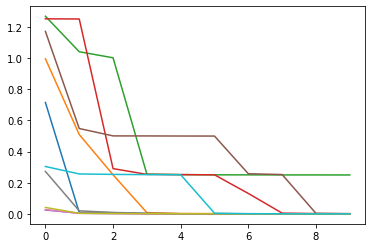

In [30]:
batch_size = 10
learning_rate = 1
number_of_epochs = 10
average_accuracy = []
for i in range(10):
    W, b = initialize()
    total_costs = []
    for i in range(number_of_epochs):
        np.random.shuffle(train_set)
        batches = [train_set[x:x + batch_size] for x in range(0, len(train_set), batch_size)]
        for batch in batches:
            grad_W1 = np.zeros((150, 102))
            grad_b1 = np.zeros((150, 1))

            grad_W2 = np.zeros((60, 150))
            grad_b2 = np.zeros((60, 1))

            grad_W3 = np.zeros((4, 60))
            grad_b3 = np.zeros((4, 1))

            for image, label in batch:
                # Forward propagation
                a1 = feedforward(W[0], image, b[0], 'sigmoid')
                a2 = feedforward(W[1], a1, b[1], 'sigmoid')
                a3 = feedforward(W[2], a2, b[2], 'sigmoid')

                z1 = (W[0] @ image) + b[0]
                z2 = (W[1] @ a1) + b[1]
                z3 = (W[2] @ a2) + b[2]

                # Output layer
                grad_W3 += (2 * (a3 - label) * derivative_sigmoid(z3)) @ np.transpose(a2)
                grad_b3 += 2 * (a3 - label) * derivative_sigmoid(z3)

                # Hidden layer 2
                grad_a2 = np.zeros((60, 1))
                grad_a2 += np.transpose(W[2]) @ (2 * (a3 - label) * derivative_sigmoid(z3))
                grad_W2 += (derivative_sigmoid(z2) * grad_a2) @ np.transpose(a1)
                grad_b2 += grad_a2 * derivative_sigmoid(z2)

                # Hidden layer 1
                grad_a1 = np.zeros((150, 1))
                grad_a1 += np.transpose(W[1]) @ (grad_a2 * derivative_sigmoid(z2))
                grad_W1 += (grad_a1 * derivative_sigmoid(z1)) @ np.transpose(image)
                grad_b1 += grad_a1 * derivative_sigmoid(z1)

            W[0] -= (learning_rate * (grad_W1 / batch_size))
            W[1] -= (learning_rate * (grad_W2 / batch_size))
            W[2] -= (learning_rate * (grad_W3 / batch_size))

            b[0] -= (learning_rate * (grad_b1 / batch_size))
            b[1] -= (learning_rate * (grad_b2 / batch_size))
            b[2] -= (learning_rate * (grad_b3 / batch_size))
        cost = 0
        cost_calculator(train_set, W[0], W[1], W[2], b[0], b[1], b[2], cost)
    epoch_size = [x for x in range(number_of_epochs)]
    plt.plot(epoch_size, total_costs)
    average_accuracy.append(calculate_accuracy(train_set, W[0], W[1], W[2], b[0], b[1], b[2], len(train_set)))

In [33]:
print(f"Average accuracy: {mean(average_accuracy)}")

Average accuracy: 97.5
